In [1]:
import numpy as np
#import random
import matplotlib.pyplot as plt

In [2]:
# --- 1. Problem Definition (from your prompt) ---

def Easom(x,y):
    return np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

def fitness_function(xx, yy):
    x1 = xx/200 - 0.5
    y1 = yy/200 - 0.5
    z1 = Easom(x1,y1)
    x2 = xx/180 + 2
    y2 = yy/180 + 2
    z2 = Easom(x2,y2)
    x3 = xx/180 + 2
    y3 = yy/180 - 1
    z3 = Easom(x3,y3)
    x4 = xx/180 - 1
    y4 = yy/180 + 2
    z4 = Easom(x4,y4)
    return z1 + 0.7 * z2 + 0.7 * z3 + 0.7 * z4

In [3]:
# Distance function
def distance(xi, xj):
    return np.linalg.norm(xi - xj)

In [4]:
def transmission_function(x, TR):
    if x<= TR:
        return 1
    else:
        return 0

In [10]:
# --- 2. Algorithm Parameters ---
n_fireflies = 36
max_iter = 100
alpha = 0.2        # Randomness
beta0 = 1          # Base attractiveness
gamma = 0.001      # Absorption coefficient
lb, ub = 0, 1000   # Bounds for x and y
TR = 200           # Transmission range

In [11]:
# def starting_points(num_worms):
#     """Initialize the worm positions randomly."""
#     return np.random.rand(num_worms, 2) * dims

def starting_points(n_fireflies):
    """Evenly distribute particles on a grid within the search space."""
    list_glowworm = []
    start = 0.1 * ub
    end = 0.9 * ub
    
    # Determine the number of rows and columns based on the number of particles
    n_side = int(np.ceil(np.sqrt(n_fireflies)))  # Number of rows and columns in the grid
    x_coords = np.linspace(start, end, n_side)
    y_coords = np.linspace(start, end, n_side)

    # Create particles and assign grid positions
    for i in range(n_fireflies):
        # Calculate grid coordinates (i.e., row and column)
        row = i // n_side
        col = i % n_side
        grid_position = np.array([x_coords[col], y_coords[row]])  # Assign grid position
        list_glowworm.append(grid_position)
    
    return np.array(list_glowworm)

In [12]:
# Initialize fireflies
#fireflies = np.random.uniform(lb, ub, (n_fireflies, 2))
fireflies = starting_points(n_fireflies)
all_positions = [fireflies.copy()]
intensities = np.array([fitness_function(x, y) for x, y in fireflies])

In [13]:
# --- 4. Modified Firefly Algorithm Main Loop ---

# Main optimization loop
for t in range(max_iter):
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if intensities[j] > intensities[i]:
                r = distance(fireflies[i], fireflies[j])
                beta = beta0 * transmission_function(r, TR)
                rand = np.random.uniform(-0.5, 0.5, size=2)
                fireflies[i] += beta * (fireflies[j] - fireflies[i]) + alpha * rand
                fireflies[i] = np.clip(fireflies[i], lb, ub)
                intensities[i] = fitness_function(fireflies[i][0], fireflies[i][1])
    all_positions.append(fireflies.copy())

In [20]:
np.random.uniform(-0.5, 0.5, size=2)

array([0.08922086, 0.30750138])

In [14]:
# Result
best_idx = np.argmax(intensities)
best_position = fireflies[best_idx]
best_fitness = intensities[best_idx]

print("Best Position: x = {:.4f}, y = {:.4f}".format(best_position[0], best_position[1]))
print("Best Fitness: {:.6f}".format(best_fitness))

Best Position: x = 728.3758, y = 728.3771
Best Fitness: 0.999709


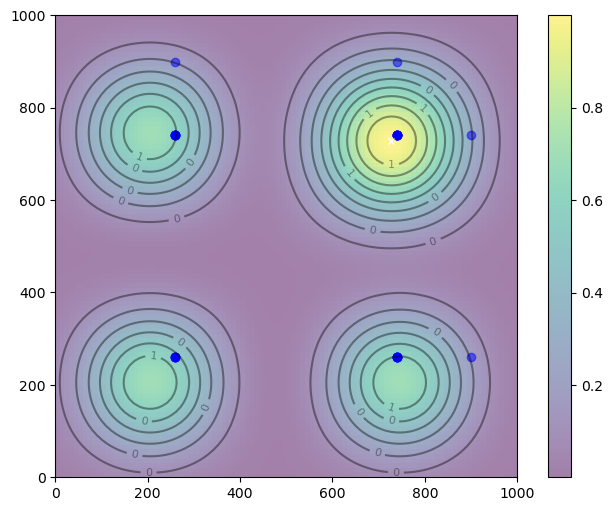

In [22]:
# Plotting - no Animation
x, y = np.array(np.meshgrid(np.linspace(lb, ub, 100), np.linspace(lb, ub, 100)))
z = fitness_function(x, y)
x_max, y_max = x.ravel()[z.argmax()], y.ravel()[z.argmax()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

i = 1
ax.clear()
ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
x_list = []
y_list = []
for j in range(n_fireflies):
    x_list.append(all_positions[i][j][0])
    y_list.append(all_positions[i][j][1])
p_plot = ax.scatter(x_list, y_list, marker='o', color='blue', alpha=0.5)
plt.show()

In [14]:
print(all_positions[-1])

[[206.61341677 206.73286393]
 [206.33167803 206.75698562]
 [746.05518081 205.46873385]
 [745.2515224  205.16151484]
 [745.36763991 205.03636698]
 [745.82325268 204.88295697]
 [206.62685569 206.52362234]
 [206.51698597 206.48809409]
 [206.41288513 206.65663307]
 [745.77960487 204.94013304]
 [745.7051041  205.4687625 ]
 [745.61771159 204.86542463]
 [204.9477151  745.51458732]
 [206.14165062 206.77878809]
 [728.32644287 728.38263937]
 [728.36013768 728.38057388]
 [746.06018962 205.39985795]
 [745.49180397 205.02022858]
 [205.07238229 745.62455913]
 [205.22162318 745.52644176]
 [728.2259731  728.38561246]
 [728.3778692  728.39914079]
 [728.37893387 728.3569486 ]
 [728.38627431 728.40987025]
 [205.2308108  745.40537139]
 [205.00687436 745.75154825]
 [204.95715933 745.57606394]
 [728.36925645 728.43299978]
 [728.35229761 728.34260253]
 [728.37594195 728.37573277]
 [204.99608432 745.35524592]
 [204.95056107 745.61847719]
 [205.26263861 745.5282189 ]
 [728.36645159 728.4020253 ]
 [728.32986058